# AutoEncoders
- 인공 신경망을 활용하여 이미지를 인코딩 및 디코딩을 하는것
  - 기존 인공 신경망의 원리는 같지만 입력층와 출력층을 똑같이 하여 인코딩과 디코딩을 구현한다.
  - 이미지 데이터 말고도 다른 형태의 데이터도 입력가능하다.
  - 데이터간의 상관관계가 있을 수록 이미지 복원이 깔끔하게 된다
    - 보통 이미지는 픽셀간의 연관이 있기때문에 AutoEnoders을 사용하기 적합하다.
    - 단순한 이미지이면 선형 AutoEncoders를 써도 되지만 복잡한 이미지는 합성곱 AutoEncoders를 사용하는것이 좋다
  - 활용분야: 노이즈 제거, 이미지 압축, 부정거래 감지,PCA(데이터셋 차원 수 감소)

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow .keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt # 그래프 생성
import numpy as np


### Loading the dataset
- dataset: mnist데이타 사용
  - https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [6]:
y_train[0]

5

### Visualizing the images
- 이미지 시각화
  - 사람이 데이터를 분석하기 편하도록 데이터를 시각화해야한다.

3


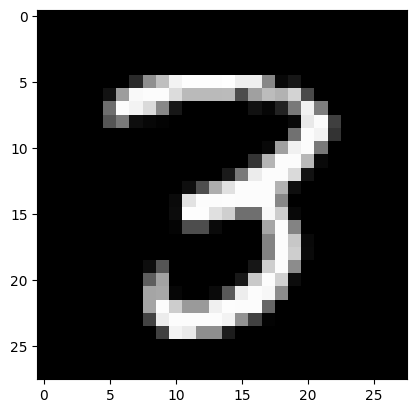

In [42]:
# random 인덱스 추출방법
i = np.random.randint(0,59999) # 데이터가 0~59999개
print(y_train[i])
plt.imshow(x_train[i],cmap='gray');

(10, 10)
(100,)


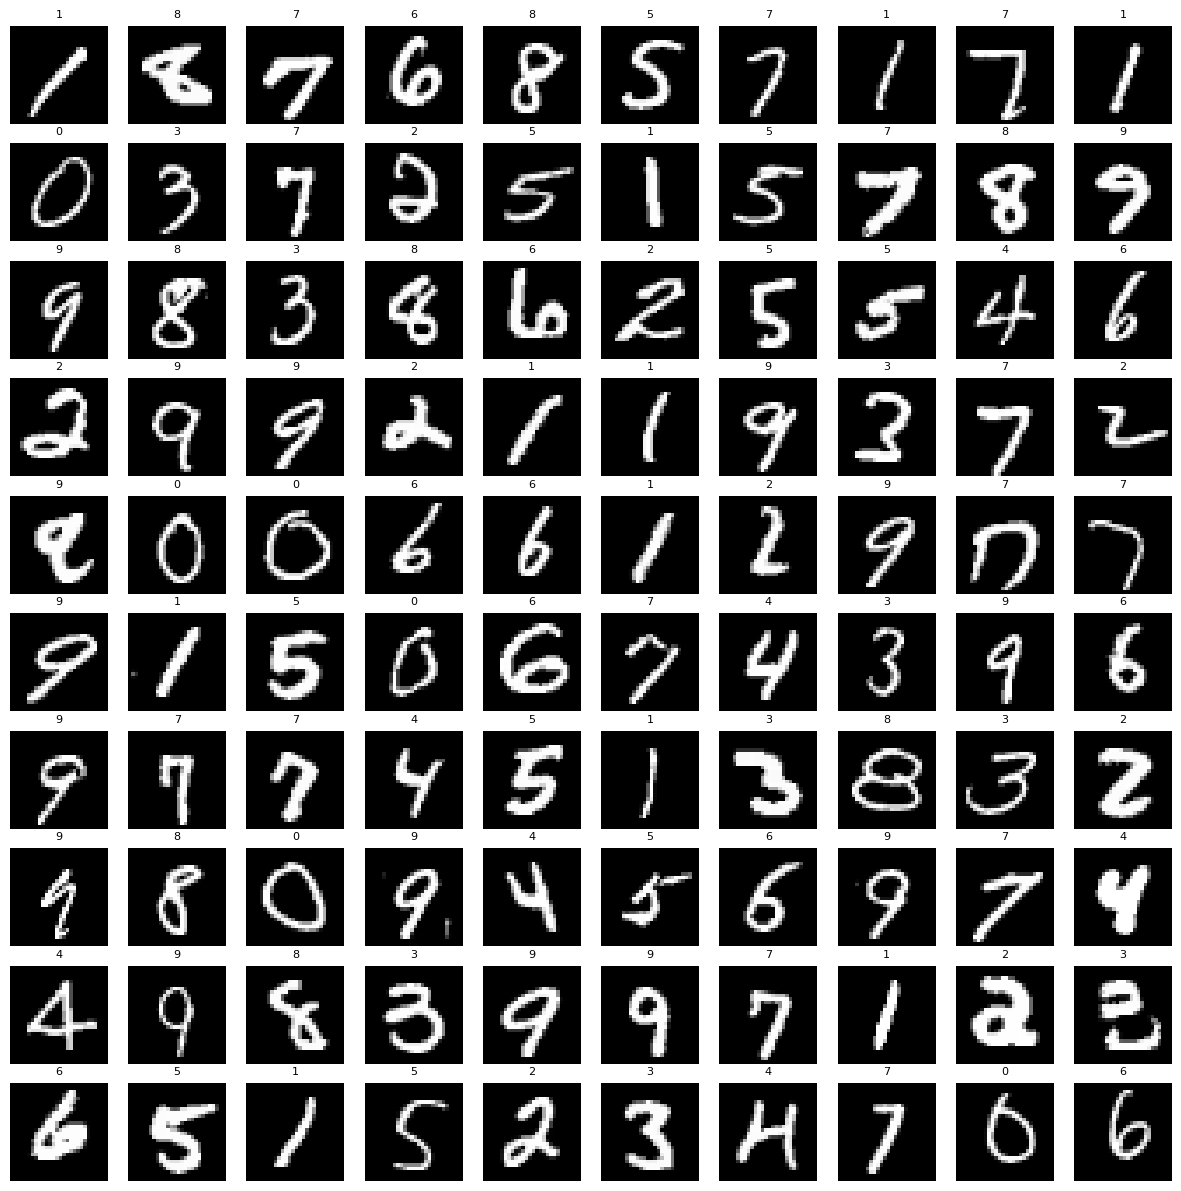

In [43]:
width = 10
height = 10
#fig(도표), axes
# plt.subplots는 그리드를 만드는 함수 매개변수 - (가로길이, 세로 길이, 각 서브 그래프 구분선의 크기)
# 가로에 서브 그래프 10개 세로에 서브 그래프 10개인 그리드 도표가 만들어졌다
fig, axes = plt.subplots(height,width,figsize=(15,15) )
print(axes.shape)
#(10,10) 형태의 그리드를 일렬로 세운다
axes = axes.ravel() # ->(10,10) -> 100
print(axes.shape)
# 각각의 서브 그래프들을 순회하면서 랜덤으로 데이터셋안에 있는 그림은 삽입한다.
for i in np.arange(0,width * height) : # 0~ 100까
  index = np.random.randint(0,59999)
  axes[i].imshow(x_train[index],cmap='gray')
  axes[i].set_title(y_train[index], fontsize=8)
  # axis('off')를 안할시 제목에 다른 정보들도 같이 기록되어 보기 안좋다.
  axes[i].axis('off')

### Pre-processing the images

In [7]:
# 픽셀은 0~255 크기를 갖는다
x_train[0].min(), x_train[0].max()

(0, 255)

In [8]:
# 0~1사이에 값이 있을 수 있도록 정규화해준다
x_train = x_train/255
x_test= x_test/255

In [9]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [10]:
x_train.shape[0], x_train.shape[1], x_train.shape[2]

(60000, 28, 28)

In [11]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
# reshape를 하면
x_train= x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_train.shape

(60000, 784)

In [12]:
# 선형 인코더는 입력으로 모든 픽셀을 다 사용하기 때문에 행렬로 되어있는 데이터를 1차원 벡터로 변환해주어야한다
x_test= x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
x_test.shape

(10000, 784)

### 선형 오토인코더 구축 및 학습
- 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
- Encode, Decode 학습은 모두 하나의 모델에서 하지만 각각의 기능은 독립적으로 동작한다.
  - 따라서 전체 신경망을 한번에 학습한 후 신경망을 분리하여야한다.

In [13]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim=784))
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units=64, activation='relu'))
autoencoder.add(Dense(units=128, activation='relu'))
# 활성화 함수가 시그모이드인 이유는 정규화된 픽셀값들은 0~1사이이다. sigmoid의 반환값도 0~1사이이기때문이다.
autoencoder.add(Dense(units=784, activation='sigmoid'))

In [14]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [15]:
# sigmoid이기때문에 binary_crossentropy를 사용한다
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
# 입력 데이터와 라벨 데이터가 같다 -> 오토인코더는 자기 자신이 결과로 나와야되기 때문이다.
# 정확도는 중요하지 않다. -> 어차피 모든픽셀을 비교해서 정확도가 높게 나올수가 없기 때문이다.
autoencoder.fit(x_train,x_train,epochs=50)


Epoch 1/50
1779/1875 [===========================>..] - ETA: 1s - loss: 0.1528 - accuracy: 0.0092

KeyboardInterrupt: 

### Encoding the images
- 여태까지 인코딩 디코딩을 갖이 모아둔 신경망을 구축하였다. 각각의 기능을 독립적으로 활용하기 위해선 신경망 모델을 분리하여야한다.


In [16]:
# Model은 이미 생성된 모델을 분할하는 도구이다
# inputs으론 우리가 만든 784를 입력으로 받는 autoencoder.input레이어를 활용한다
# Encoder의 outputs은 인코딩되어 픽셀이 32개밖에 없는 데이터이다.
# 따라서 layer name = dense_2 가 output이다.
# get_layer('layer 이르').output은 해당 층을 가져오고 그 층들의 값을 output으로 내보낸다.
encoder = Model(inputs = autoencoder.input, outputs= autoencoder.get_layer('dense_2').output)

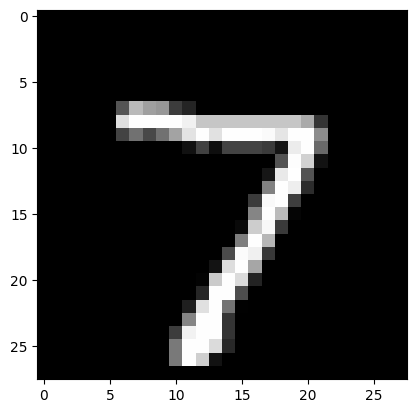

In [17]:
# 우리가 예시로 인코딩 디코딩한 이미지이다.
# 우리의 입력층의 개수는 784(28*28)이므로 reshape으로 이미지를 축소시킨다.
plt.imshow(x_test[0].reshape(28,28), cmap='gray');

In [18]:
# x_test[0]은 행과 열로 되어져있는 이미지이다. encoder에 입력할 수 있도록 평탄화를 해주어야한다.
encoded_image = encoder.predict(x_test[0].reshape(1,-1))

1/1 [==============================] - 0s 156ms/step


In [19]:
# 32개의 출력이 나왔다. 이 출력은 평탄화 되어있는 형태이다.
encoded_image, encoded_image.shape

(array([[0.27935693, 0.38236684, 0.        , 0.21157978, 0.        ,
         0.        , 0.        , 0.        , 0.20118266, 0.        ,
         0.31636807, 0.02102387, 0.        , 0.28223372, 0.        ,
         0.11726028, 0.        , 0.06935787, 0.1556966 , 0.3523466 ,
         0.04202497, 0.        , 0.14392778, 0.        , 0.        ,
         0.16946355, 0.        , 0.03610484, 0.        , 0.38308945,
         0.        , 0.        ]], dtype=float32),
 (1, 32))

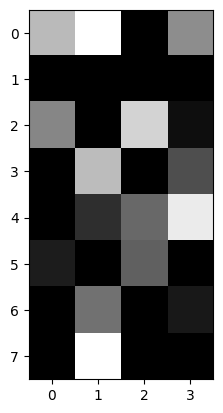

In [20]:
# 평탄화 되어있는 encoded_image를 사람이 보기쉽게 (8,4)형태의 이미지로 바꿔서 특징맵을 본다.
plt.imshow(encoded_image.reshape(8,4),cmap='gray');

### Decoding the images
- 인코더처럼 디코더도 기존의 신경망에서 따로 빼와야한다.
  - 하지만 인코더와 달리 디코더는 중간 레이어에서 입력을 받기때문에 입력층을 따로 만들어야한다.

In [21]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3] # layers[i]는 몇번째 layer를 가져올것인가이다.
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
# Model의 input레이어는 사용자가 정의한 input_layer_decoder로 32픽셀을 받아온다.
# 그 다음 레이어를 추가해주어야 한다. 각각의 레이어를 연결하는 방법은 레이어(이전레이어)이다.
# 따라서 가장 처음 레이어인 input_layer_Deconder가 안쪽 괄호에 있고 두번째 레이어인 decoder_layer1이 두번째 안쪽 괄호에 있다.
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [22]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111568 (435.81 KB)
Trainable params: 111568 (435.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 60ms/step


In [24]:
decoded_image.shape

(1, 784)

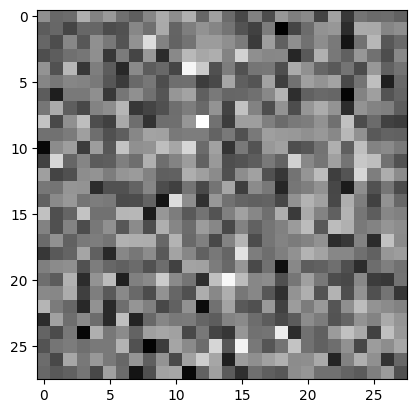

In [25]:
plt.imshow(decoded_image.reshape(28,28),cmap='gray');

### Encoding and decoding the test images
- 여러 테스트 이미지를 autoencoder에 적용하고 test하기
  - 분석하기 편하도록 분석 결과를 시각화 하자.


In [26]:
x_test.shape[0] # 0~9999의 인덱스를 가진다

10000

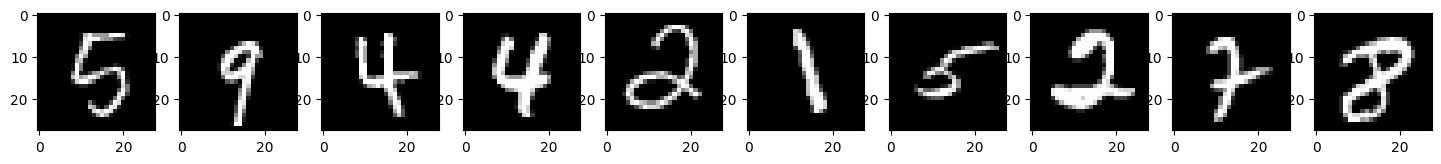

In [28]:
# 모든 데이터를 다 테스트 하긴 오래걸리니 랜덤으로 10개의 이미지만 테스트 한다.
n_images=10
test_images = np.random.randint(0,x_test.shape[0] -1, size = n_images)

plt.figure(figsize=(18,18))
for i , image_index in enumerate(test_images):
  ax = plt.subplot(10,10,i+1)
  plt.imshow(x_test[image_index].reshape(28,28), cmap='gray')